In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
import numpy as np

##### Data Access

In [2]:
env = pd.read_csv('envelopes/142-Channel1_env.csv')
env['seconds'] = env.index/125

test = pd.read_csv('envelopes/142-Channel2_env.csv')
test['seconds'] = test.index/125


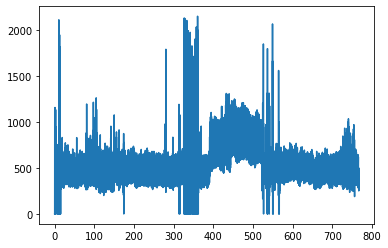

In [3]:
plt.plot(env.seconds, env.posVelocity)

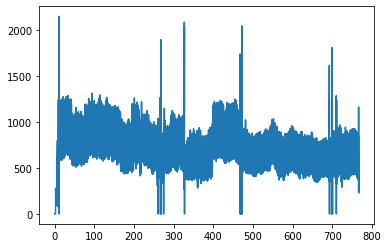

In [4]:
plt.plot(test.seconds, test.posVelocity)

##### z-score Normalization

In [5]:
env['zi'] = (env.posVelocity - env.posVelocity.mean()) / env.posVelocity.std()
zi = list(env['zi'])

test['zi'] = (test.posVelocity - test.posVelocity.mean()) / test.posVelocity.std()
test_zi = list(test['zi'])

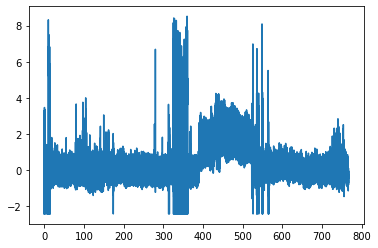

In [6]:
plt.plot(env.seconds, env.zi)

##### Frame Creation

In [7]:
def make_frames(seq, frame_size=150, step_size=60):
    return array([array(seq[idx : idx+frame_size]) 
                  for idx in  range (0, len(seq)-frame_size, step_size)])

In [8]:
fs = 128
ss=30
zi_frames = make_frames(zi, fs, ss)

test_frames = make_frames(test_zi, fs, ss)
len(zi_frames)

3193

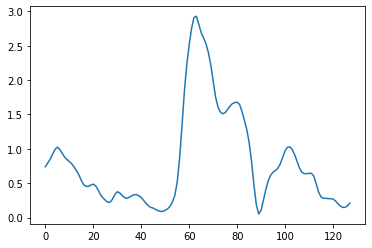

In [9]:
plt.plot(test_frames[100])

In [10]:
for frame in zi_frames:
    assert len(frame==150)

In [11]:
# univariate cnn example
from keras import Input, Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, ZeroPadding1D, MaxPooling1D, AveragePooling1D, UpSampling1D, Dropout, Flatten, Dense, Reshape

Using TensorFlow backend.
/home/nova_aditya/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nova_aditya/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nova_aditya/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nova_aditya/anaconda3/lib/python3.7

In [27]:
# X = zi_frames[-3072:]
# X_test = test_frames[-3072:]

X = zi_frames.reshape((zi_frames.shape[0], zi_frames.shape[1], 1))
X_test = test_frames.reshape((test_frames.shape[0], test_frames.shape[1], 1))

input_sig = Input(batch_shape=(None, 128, 1))
x = Conv1D(8,3, activation='relu', padding='same', dilation_rate=2)(input_sig)
x1 = MaxPooling1D(2)(x)
x2 = Conv1D(4,3, activation='relu', padding='same', dilation_rate=2)(x1)
x3 = MaxPooling1D(2)(x2)
x4 = AveragePooling1D()(x3)
flat = Flatten()(x4)
encoded = Dense(2)(flat)
d1 = Dense(64)(encoded)
d2 = Reshape((16,4))(d1)
d3 = Conv1D(4,1,strides=1, activation='relu', padding='same')(d2)
d4 = UpSampling1D(2)(d3)
d5 = Conv1D(8,1,strides=1, activation='relu', padding='same')(d4)
d6 = UpSampling1D(2)(d5)
d7 = UpSampling1D(2)(d6)
decoded = Conv1D(1,1,strides=1, activation='sigmoid', padding='same')(d7)
autoencoder= Model(input_sig, decoded)
autoencoder.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
n_features=1

# fit model
num_epochs = 200
batch_size=256
history = autoencoder.fit(x=X, y=X,
                            epochs=num_epochs,
                            batch_size=batch_size,
                            #shuffle=True,
                            #validation_data=(X, X),
                            verbose=1)

Epoch 1/200
3193/3193 [==============================] - 1s 438us/step - loss: 1.2438 - accuracy: 0.0000e+00
Epoch 2/200
3193/3193 [==============================] - 1s 249us/step - loss: 1.2258 - accuracy: 0.0000e+00
Epoch 3/200
3193/3193 [==============================] - 1s 239us/step - loss: 1.1937 - accuracy: 0.0000e+00
Epoch 4/200
3193/3193 [==============================] - 1s 323us/step - loss: 1.1361 - accuracy: 0.0000e+00
Epoch 5/200
3193/3193 [==============================] - 1s 406us/step - loss: 1.0486 - accuracy: 0.0000e+00
Epoch 6/200
3193/3193 [==============================] - 1s 353us/step - loss: 0.9631 - accuracy: 0.0000e+00
Epoch 7/200
3193/3193 [==============================] - 1s 303us/step - loss: 0.9083 - accuracy: 0.0000e+000s - loss: 0.9133 - accuracy: 0.
Epoch 8/200
3193/3193 [==============================] - 1s 289us/step - loss: 0.8788 - accuracy: 0.0000e+00
Epoch 9/200
3193/3193 [==============================] - 1s 266us/step - loss: 0.8613 - accuracy

3193/3193 [==============================] - 1s 200us/step - loss: 0.7272 - accuracy: 0.0000e+00
Epoch 150/200
3193/3193 [==============================] - 1s 175us/step - loss: 0.7269 - accuracy: 0.0000e+00
Epoch 151/200
3193/3193 [==============================] - 1s 189us/step - loss: 0.7267 - accuracy: 0.0000e+00
Epoch 152/200
3193/3193 [==============================] - 1s 176us/step - loss: 0.7266 - accuracy: 0.0000e+00
Epoch 153/200
3193/3193 [==============================] - 1s 185us/step - loss: 0.7261 - accuracy: 0.0000e+00
Epoch 154/200
3193/3193 [==============================] - 1s 210us/step - loss: 0.7258 - accuracy: 0.0000e+00
Epoch 155/200
3193/3193 [==============================] - 1s 181us/step - loss: 0.7250 - accuracy: 0.0000e+00
Epoch 156/200
3193/3193 [==============================] - 1s 181us/step - loss: 0.7246 - accuracy: 0.0000e+00
Epoch 157/200
3193/3193 [==============================] - 1s 180us/step - loss: 0.7242 - accuracy: 0.0000e+00
Epoch 158/200
3

In [28]:
predictions = autoencoder.predict(X_test, verbose=1)
pred = predictions.reshape(predictions.shape[0], predictions.shape[1])

3193/3193 [==============================] - 1s 308us/step


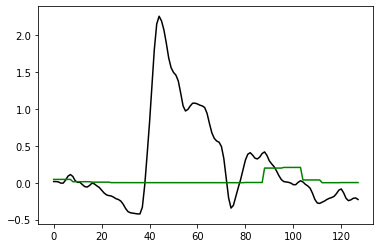

In [29]:
idx=300

Y1 = test_frames[idx]
Y2 = pred[idx]

plt.plot(Y1,color='k')
plt.plot(Y2,color='g')
plt.show()

In [25]:
def stitch_frames(frames, frame_size = 128, frame_offset=60):
    out = list(frames[0])
    for frame in frames[1:]:
        out = np.append(out, frame[60:])
    return out

test_out = stitch_frames(test_frames)
pred_out = stitch_frames(pred)

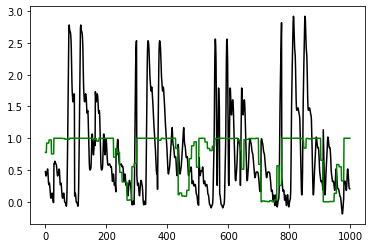

In [26]:
window = [29000, 30000]

Y1 = test_out[window[0]:window[1]]
Y2 = pred_out[window[0]:window[1]]

plt.plot(Y1,color='k')
plt.plot(Y2,color='g')
plt.show()

In [17]:
pred_beat_idx = list(np.nonzero(pred_out > .97)[0])
len(pred_beat_idx)

32448

In [18]:
pred_beat_idx

[2800,
 2801,
 2802,
 2803,
 2804,
 2805,
 2806,
 2807,
 2808,
 2809,
 2810,
 2811,
 2812,
 2813,
 2814,
 2815,
 2816,
 2817,
 2818,
 2819,
 2820,
 2821,
 2822,
 2823,
 2824,
 2825,
 2826,
 2827,
 2828,
 2829,
 2830,
 2831,
 2832,
 2833,
 2834,
 2835,
 2836,
 2837,
 2838,
 2839,
 2840,
 2841,
 2842,
 2843,
 2844,
 2845,
 2846,
 2847,
 2848,
 2849,
 2850,
 2851,
 2852,
 2853,
 2854,
 2855,
 2856,
 2857,
 2858,
 2859,
 2860,
 2861,
 2862,
 2863,
 2864,
 2865,
 2866,
 2867,
 2868,
 2869,
 2870,
 2871,
 2872,
 2873,
 2874,
 2875,
 2876,
 2877,
 2878,
 2879,
 2880,
 2881,
 2882,
 2883,
 2916,
 2917,
 2918,
 2919,
 2920,
 2921,
 2922,
 2923,
 2924,
 2925,
 2926,
 2927,
 2928,
 2929,
 2930,
 2931,
 2932,
 2933,
 2934,
 2935,
 2936,
 2937,
 2938,
 2939,
 2940,
 2941,
 2942,
 2943,
 3156,
 3157,
 3158,
 3159,
 3160,
 3161,
 3162,
 3163,
 3208,
 3209,
 3210,
 3211,
 3212,
 3213,
 3214,
 3215,
 3216,
 3217,
 3218,
 3219,
 3220,
 3221,
 3222,
 3223,
 3260,
 3261,
 3262,
 3263,
 3264,
 3265,
 3266,

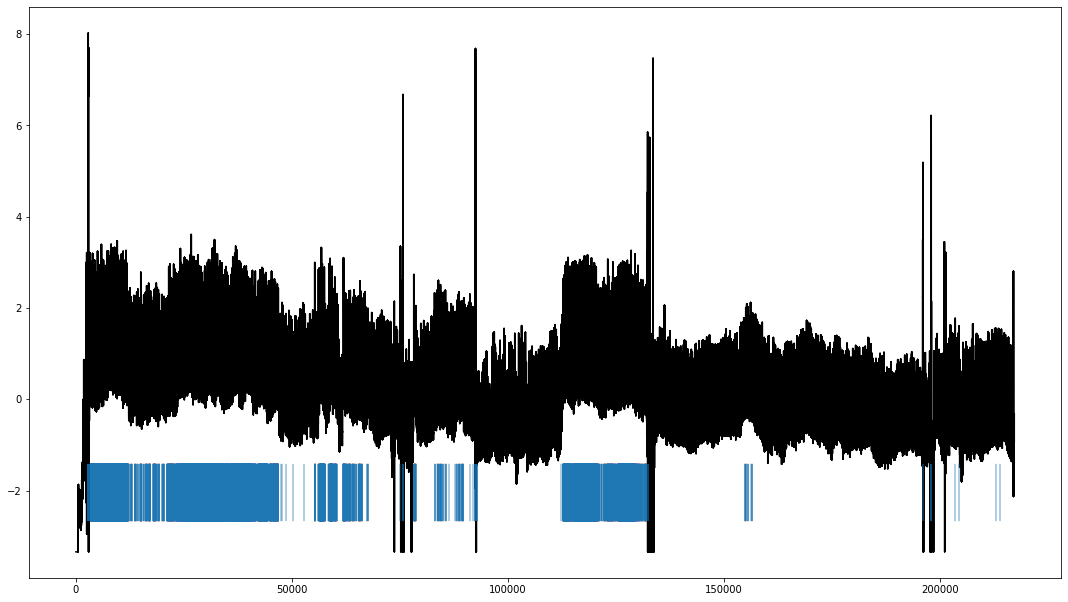

In [19]:
# window = [0, 20000]

# Y1 = test_out[window[0]:window[1]]

Y1 = test_out

plt.plot(Y1,color='k')
for xc in pred_beat_idx:
    plt.axvline(x=xc, ymin=.1, ymax=.2, linewidth=.1)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [20]:
pred_beat_ranges = [[x-50, x+50] for x in pred_beat_idx]
pred_beat_ranges

[[2750, 2850],
 [2751, 2851],
 [2752, 2852],
 [2753, 2853],
 [2754, 2854],
 [2755, 2855],
 [2756, 2856],
 [2757, 2857],
 [2758, 2858],
 [2759, 2859],
 [2760, 2860],
 [2761, 2861],
 [2762, 2862],
 [2763, 2863],
 [2764, 2864],
 [2765, 2865],
 [2766, 2866],
 [2767, 2867],
 [2768, 2868],
 [2769, 2869],
 [2770, 2870],
 [2771, 2871],
 [2772, 2872],
 [2773, 2873],
 [2774, 2874],
 [2775, 2875],
 [2776, 2876],
 [2777, 2877],
 [2778, 2878],
 [2779, 2879],
 [2780, 2880],
 [2781, 2881],
 [2782, 2882],
 [2783, 2883],
 [2784, 2884],
 [2785, 2885],
 [2786, 2886],
 [2787, 2887],
 [2788, 2888],
 [2789, 2889],
 [2790, 2890],
 [2791, 2891],
 [2792, 2892],
 [2793, 2893],
 [2794, 2894],
 [2795, 2895],
 [2796, 2896],
 [2797, 2897],
 [2798, 2898],
 [2799, 2899],
 [2800, 2900],
 [2801, 2901],
 [2802, 2902],
 [2803, 2903],
 [2804, 2904],
 [2805, 2905],
 [2806, 2906],
 [2807, 2907],
 [2808, 2908],
 [2809, 2909],
 [2810, 2910],
 [2811, 2911],
 [2812, 2912],
 [2813, 2913],
 [2814, 2914],
 [2815, 2915],
 [2816, 29

In [21]:
import itertools